In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.9 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
zip_path = "/content/drive/MyDrive/Colab Notebooks/DATASETS/dataset_1024_resolucion/dataset_arboles_v4.zip"


In [4]:
!unzip -q "{zip_path}" -d /content/


In [5]:
# Fine-tuning final YOLOv8l - Precisión
from ultralytics import YOLO
import os

ROOT = "/content/dataset_arboles_v4"
yaml_path = os.path.join(ROOT, "data.yaml")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [8]:
# Cargar tu mejor modelo anterior
model = YOLO("/content/drive/MyDrive/Colab Notebooks/DATASETS/dataset_1024_resolucion/yolo_runs_backup_versionL_adams_lr_v1/weights/best.pt")

results = model.train(
    data=yaml_path,
    epochs=50,          # pocas épocas (finetuning)
    imgsz=1024,
    batch=12,
    device=0,
    workers=8,
    seed=42,
    project="/content/runs",
    name="yolov8l_1024_precision_finetune_finalAdamW",

    # Learning rate muy bajo para no dañar lo previo
    optimizer="AdamW",
    lr0=0.00025,        # MUY bajo = ajuste fino real
    weight_decay=0.0003,
    cos_lr=True,
    lrf=0.01,

    # Augmentations sobrias (nada agresivo)
    close_mosaic=10,
    hsv_h=0.01, hsv_s=0.4, hsv_v=0.25,
    fliplr=0.4,
    flipud=0.0,
    translate=0.03,
    scale=0.30,

    # Para evitar gastar más unidades si no mejora
    patience=12,
    val=True,
    save=True,
    plots=True
)

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/dataset_arboles_v4/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.4, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.01, hsv_s=0.4, hsv_v=0.25, imgsz=1024, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.00025, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/Colab Notebooks/DATASETS/dataset_1024_resolucion/yolo_runs_backup_versionL_adams_lr_v1/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=y

In [9]:
!ls -lt /content/runs


total 8
drwxr-xr-x 3 root root 4096 Nov 19 05:27 yolov8l_1024_precision_finetune_finalAdamW2
drwxr-xr-x 3 root root 4096 Nov 19 02:26 yolov8l_1024_precision_finetune_finalAdamW


In [13]:
!cp -r /content/runs/yolov8l_1024_precision_finetune_finalAdamW2 /content/drive/MyDrive/yolo_runs_backup_FineTunningVersionAdams/

In [14]:
### VISUALZAR METRICAS

In [18]:
from ultralytics import YOLO
import os

# =====================================================
# CONFIGURACIÓN PARA GOOGLE COLAB — EDITA ESTAS RUTAS
# =====================================================

RUTA_PESOS = "/content/drive/MyDrive/yolo_runs_backup_FineTunningVersionAdams/yolov8l_1024_precision_finetune_finalAdamW2/weights/best.pt"
RUTA_DATA  = "/content/dataset_arboles_v4/data.yaml"

SPLIT   = "test"    # o "val"
IMG_SIZE = 1024
CONF_TH  = 0.25
IOU_TH   = 0.5

print("Pesos :", RUTA_PESOS)
print("Data  :", RUTA_DATA)
print("Split :", SPLIT)

Pesos : /content/drive/MyDrive/yolo_runs_backup_FineTunningVersionAdams/yolov8l_1024_precision_finetune_finalAdamW2/weights/best.pt
Data  : /content/dataset_arboles_v4/data.yaml
Split : test


In [19]:
model = YOLO(RUTA_PESOS)

metrics = model.val(
    data=RUTA_DATA,
    split=SPLIT,
    imgsz=IMG_SIZE,
    conf=CONF_TH,
    iou=IOU_TH,
    plots=True,
    save_json=True
)

metrics

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
Model summary (fused): 112 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2991.2±371.5 MB/s, size: 1099.4 KB)
val: Scanning /content/dataset_arboles_v4/labels/test... 1235 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1235/1235 148.5it/s 8.3s
val: New cache created: /content/dataset_arboles_v4/labels/test.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 78/78 3.8it/s 20.6s
                   all       1235      14465      0.815      0.656      0.766      0.553
Speed: 2.1ms preprocess, 8.2ms inference, 0.0ms loss, 1.2ms postprocess per image
Saving /content/runs/detect/val/predictions.json...
Results saved to /content/runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c1fd5994620>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [20]:
res = metrics.results_dict
for k, v in res.items():
    print(f"{k:25s} -> {v}")

metrics/precision(B)      -> 0.8148989233227274
metrics/recall(B)         -> 0.6555745121638584
metrics/mAP50(B)          -> 0.7664398226176368
metrics/mAP50-95(B)       -> 0.5532892365450734
fitness                   -> 0.5532892365450734


Carpeta de resultados: /content/runs/detect/val
No existe: results.png
No existe: PR_curve.png
No existe: F1_curve.png
No existe: P_curve.png
No existe: R_curve.png

Mostrando: confusion_matrix.png


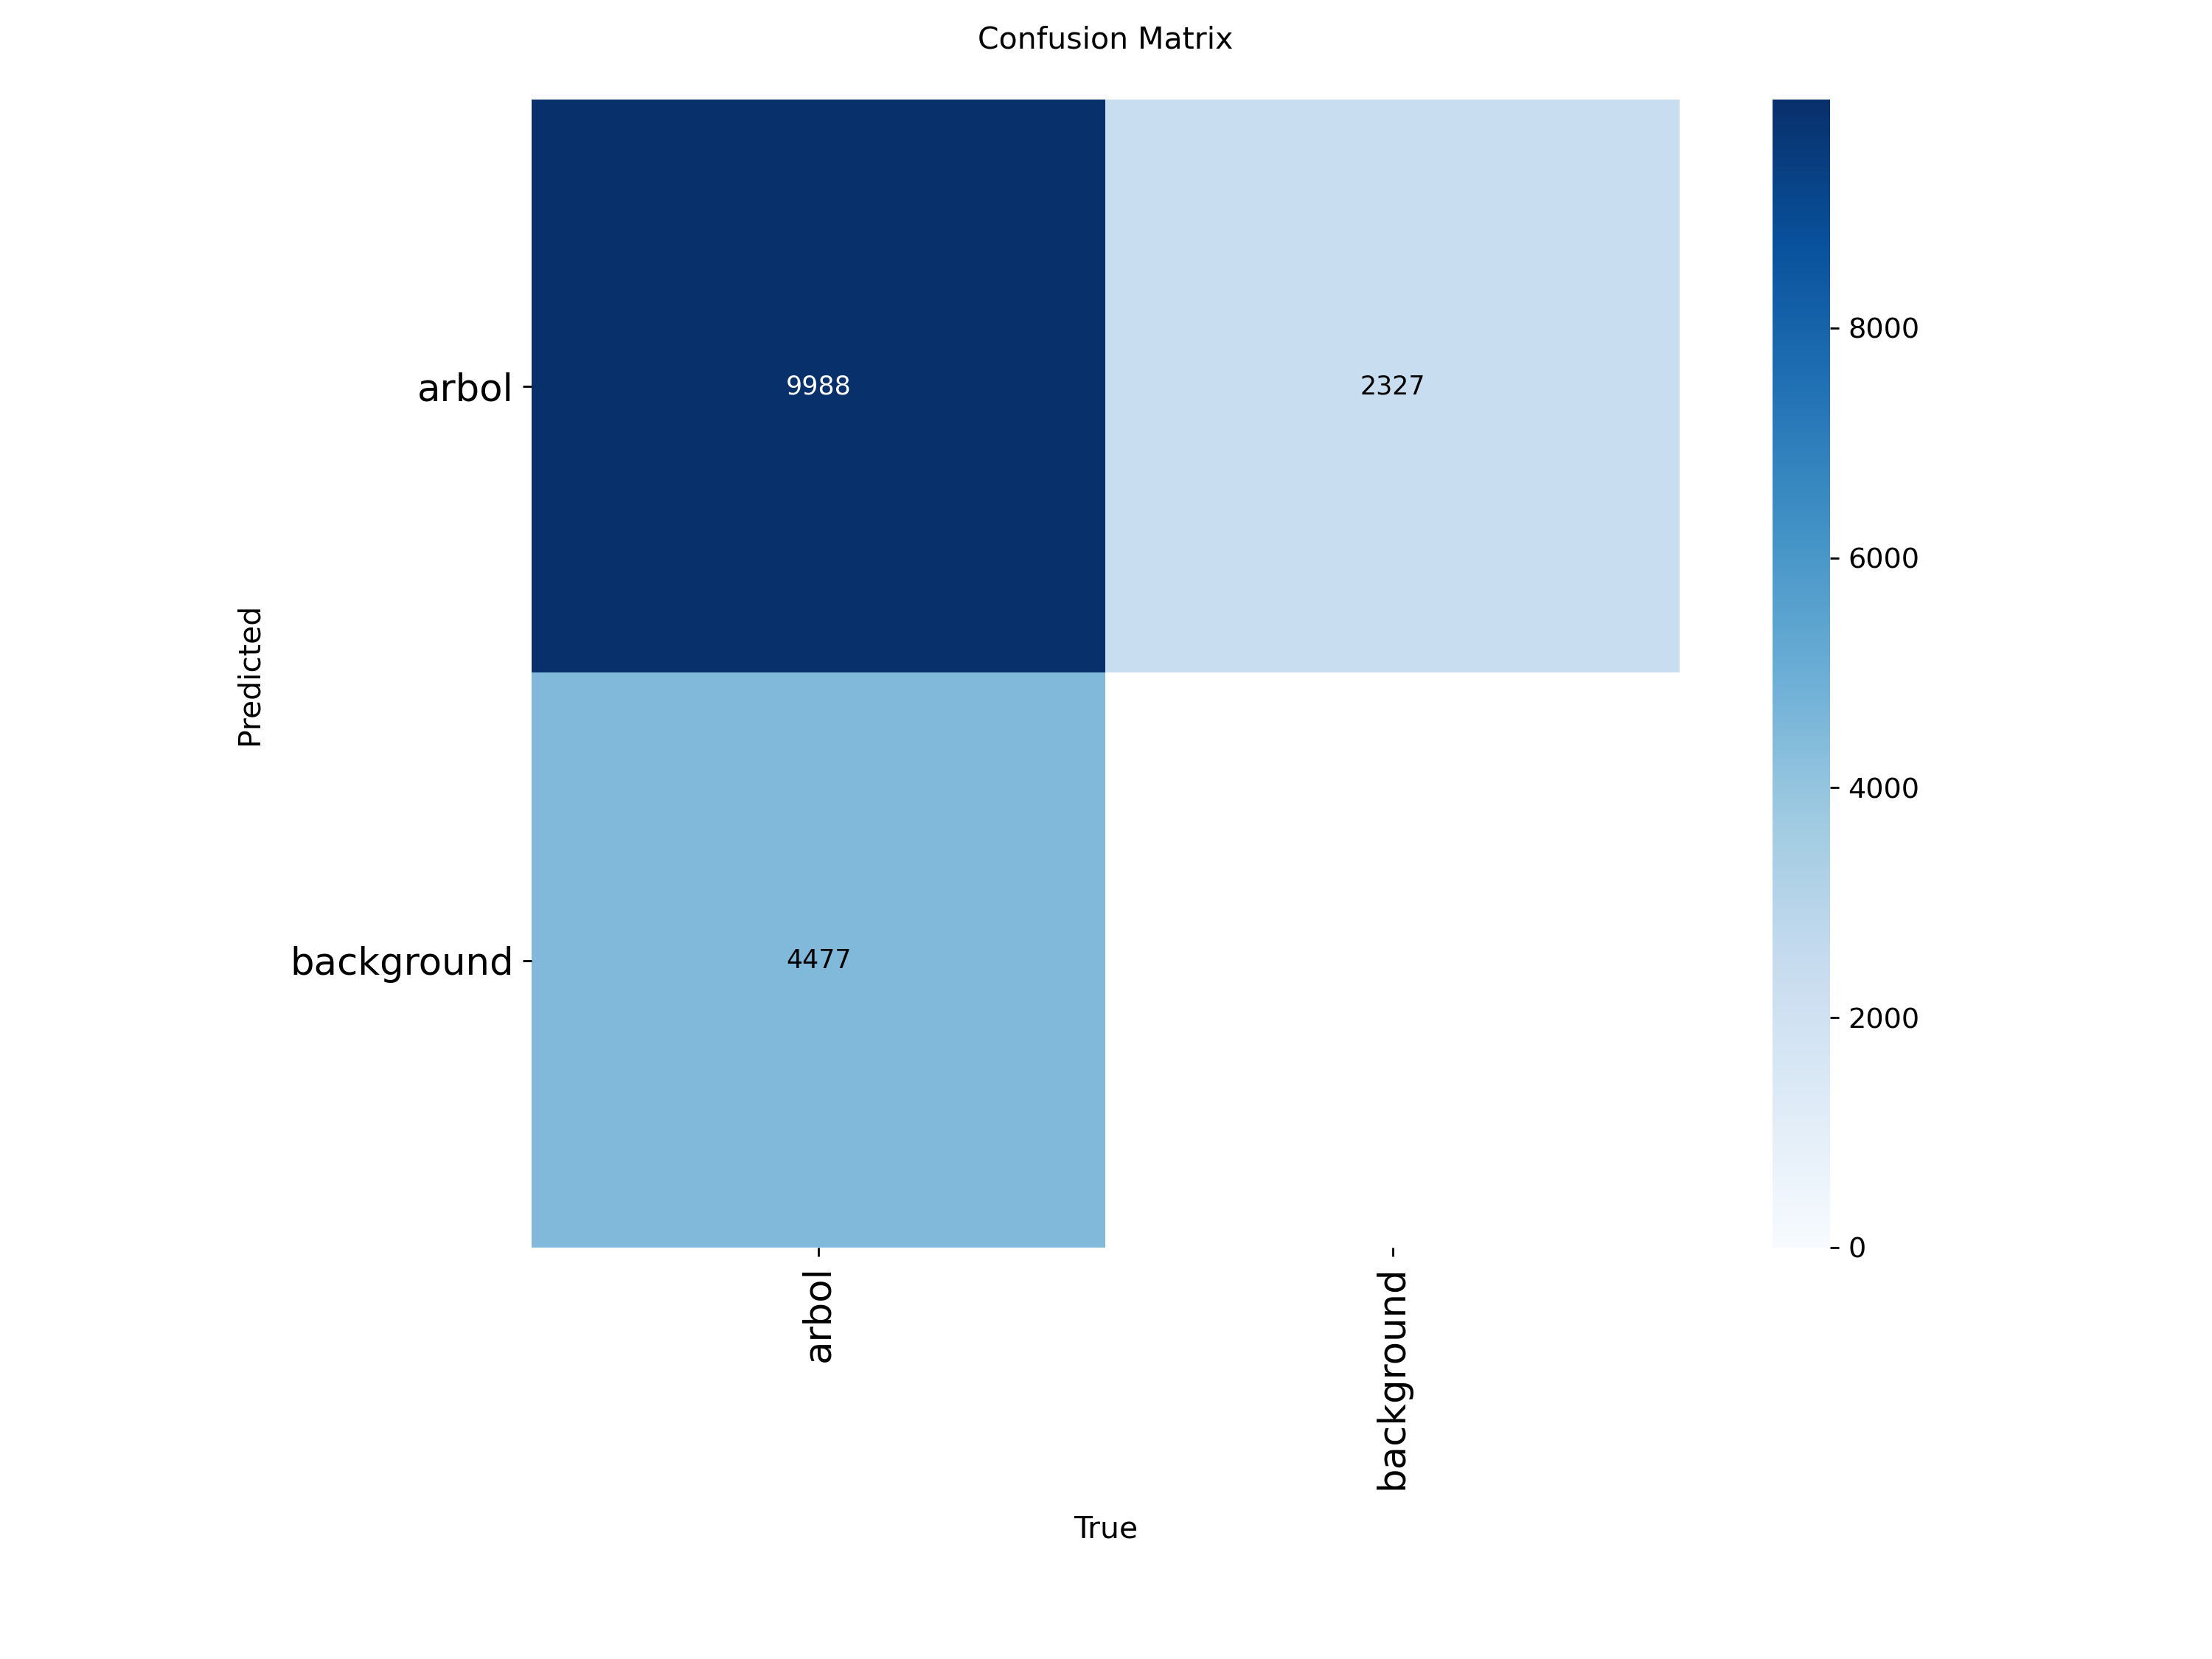


Mostrando: confusion_matrix_normalized.png


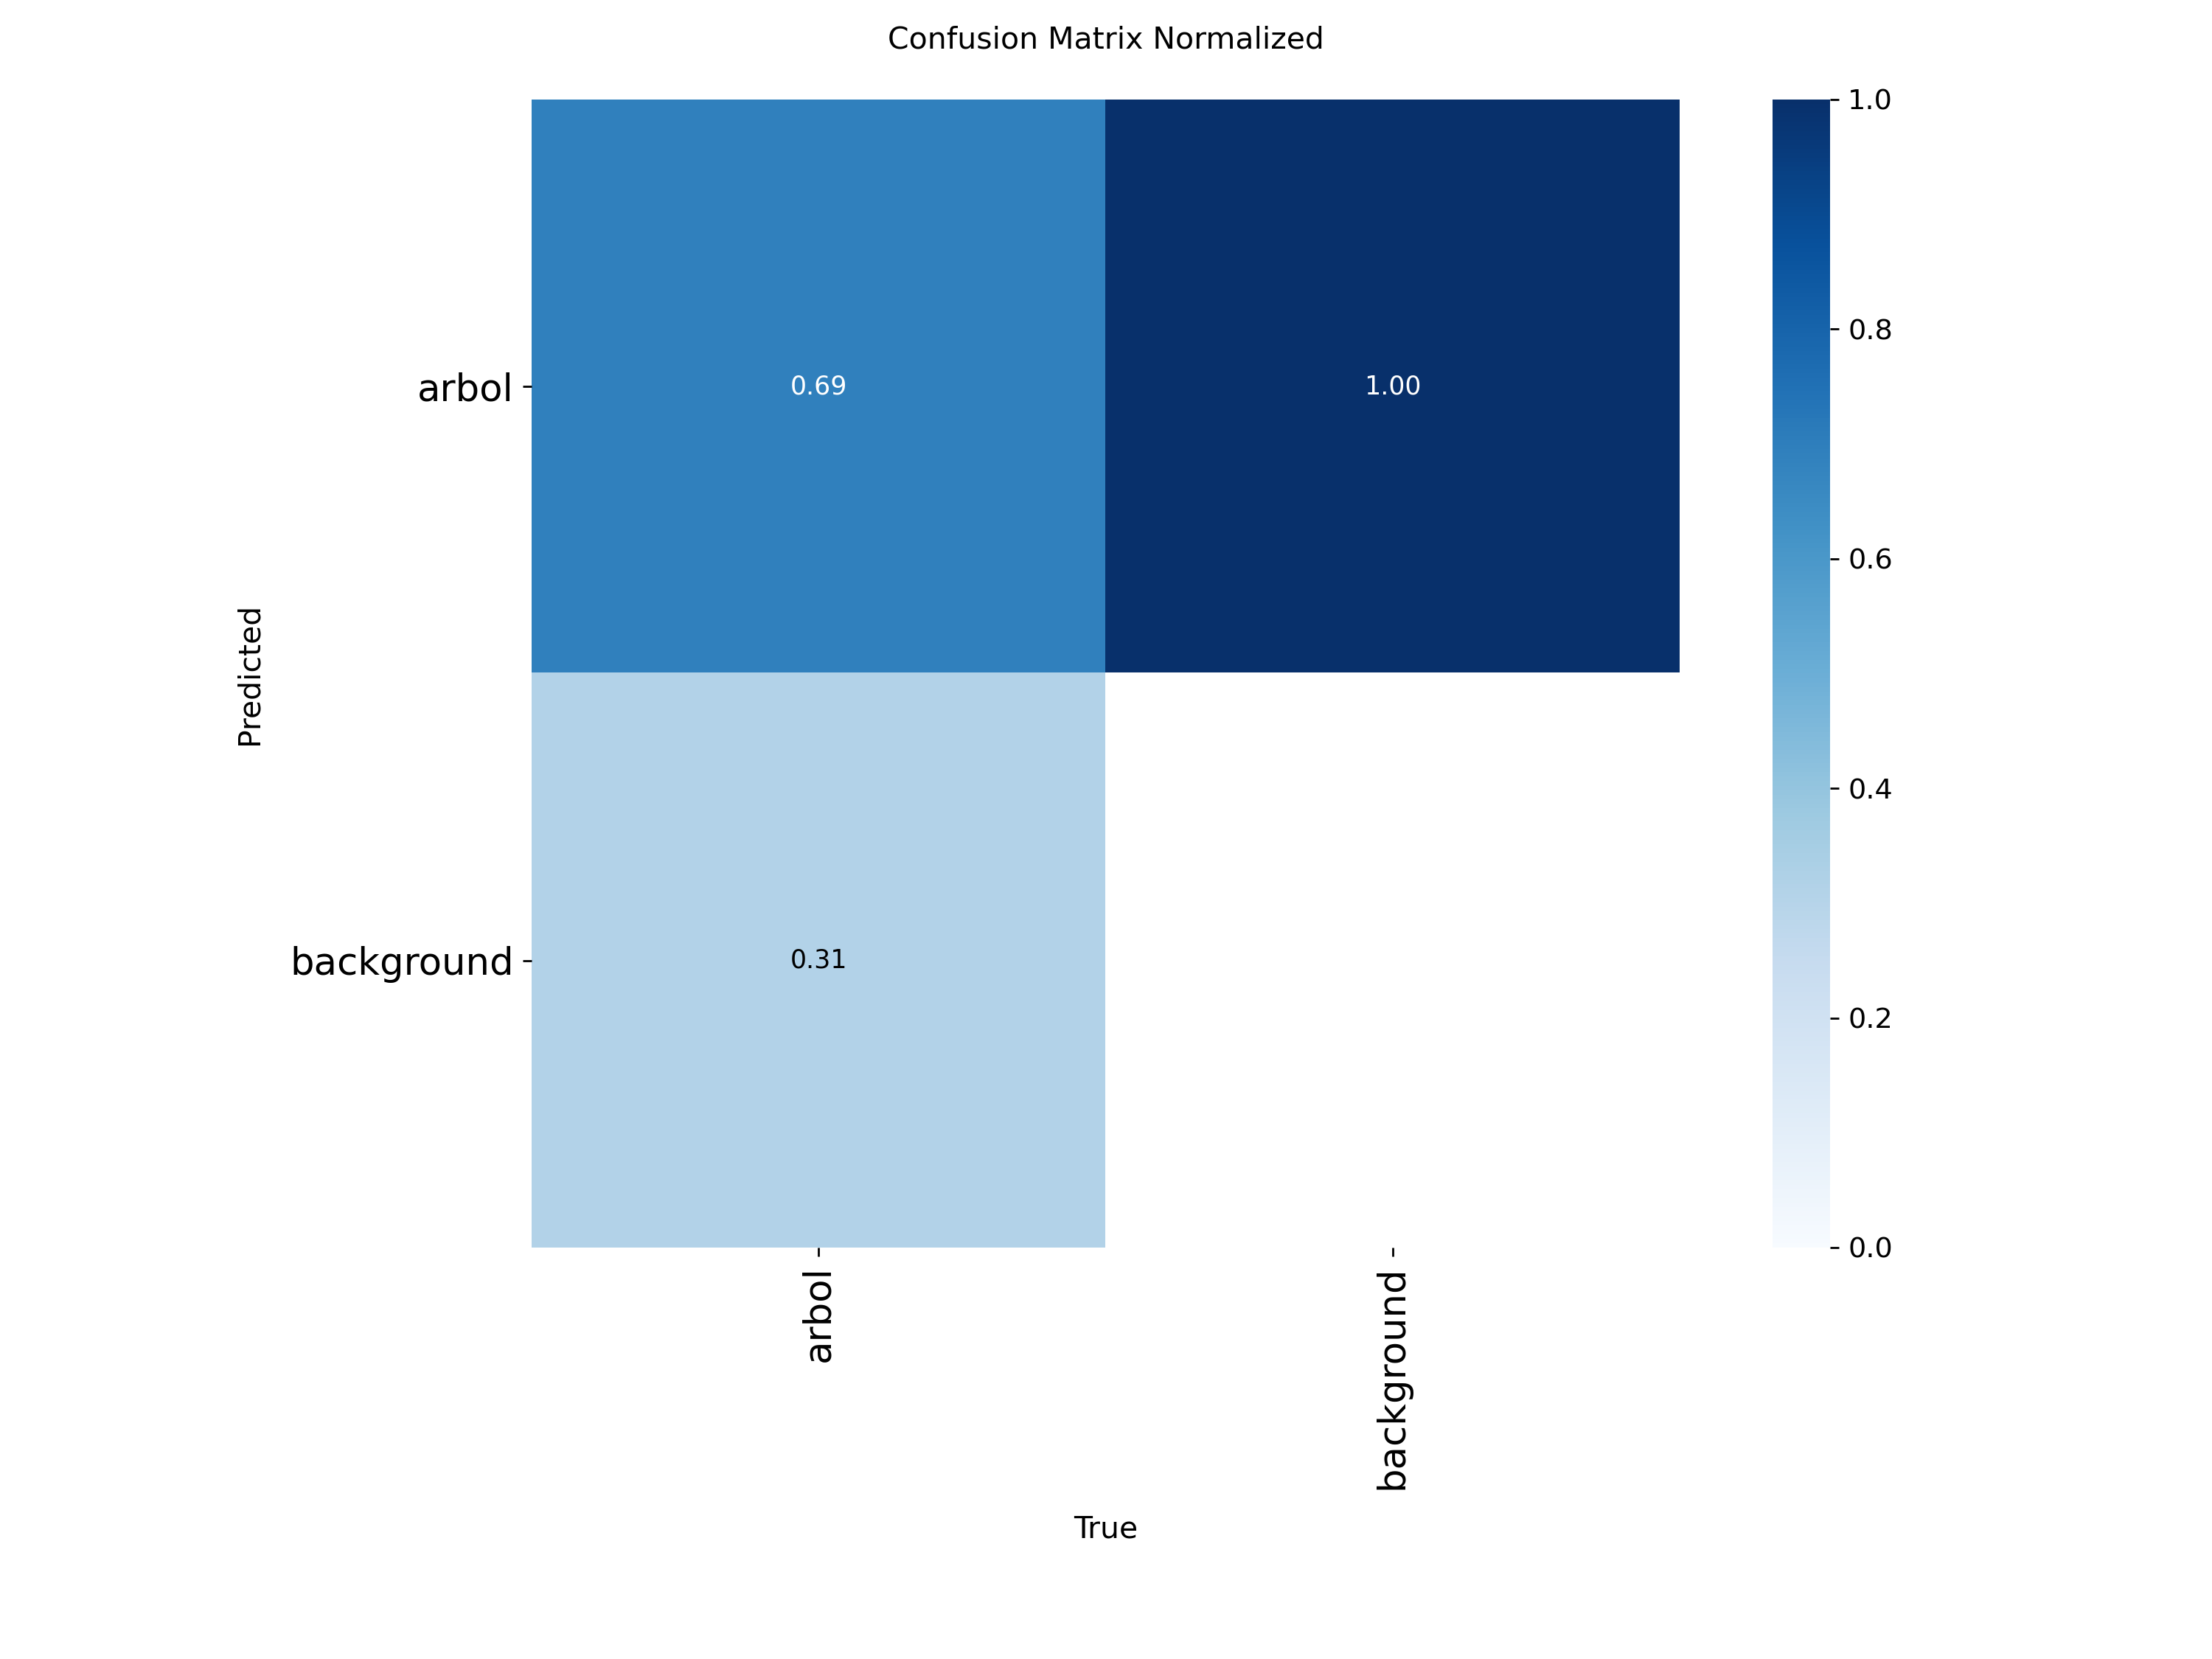

In [21]:
import os
from IPython.display import Image, display

# =========================
# Mostrar las figuras generadas por model.val()
# =========================

base_dir = metrics.save_dir   # carpeta donde YOLO guardó los resultados
print("Carpeta de resultados:", base_dir)

figuras = [
    "results.png",
    "PR_curve.png",
    "F1_curve.png",
    "P_curve.png",
    "R_curve.png",
    "confusion_matrix.png",
    "confusion_matrix_normalized.png",
]

for fname in figuras:
    ruta = os.path.join(base_dir, fname)
    if os.path.exists(ruta):
        print("\nMostrando:", fname)
        display(Image(filename=ruta))
    else:
        print("No existe:", fname)